In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
combo2_file = "/data5/deepro/ukbiobank/papers/bmi_project/3_run_rarecomb/pre_menopause/data/parsed_tables/combo_2.csv"
combo3_file = "/data5/deepro/ukbiobank/papers/bmi_project/3_run_rarecomb/pre_menopause/data/parsed_tables/combo_3.csv"
akbari_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/pre_menopause/data/effect_sizes/akbari.csv"
turcot_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/pre_menopause/data/effect_sizes/giant.csv"

In [3]:
combo2_df = pd.read_csv(combo2_file)
# combo3_df = pd.read_csv(combo3_file)
akbari_df = pd.read_csv(akbari_file)
turcot_df = pd.read_csv(turcot_file)

In [4]:
combo2_efs = combo2_df.Effect_Size.to_frame(name="Effect Size")
combo2_efs["Description"] = "Digenic combinations"
# combo3_efs = combo3_df.Effect_Size.to_frame(name="Effect Size")
# combo3_efs["Description"] = "Trigenic combinations"
akbari_efs = akbari_df.effect_size.to_frame(name="Effect Size")
akbari_efs["Description"] = "Akbari et. al."
turcot_efs = turcot_df.effect_size.to_frame(name="Effect Size")
turcot_efs["Description"] = "Turcot et. al."

efs_df = pd.concat([combo2_efs, akbari_efs, turcot_efs], axis=0) # combo3_efs, 

[Text(0, 0, 'Digenic\ncombinations'),
 Text(1, 0, 'Akbari et. al.'),
 Text(2, 0, 'Turcot et. al.')]

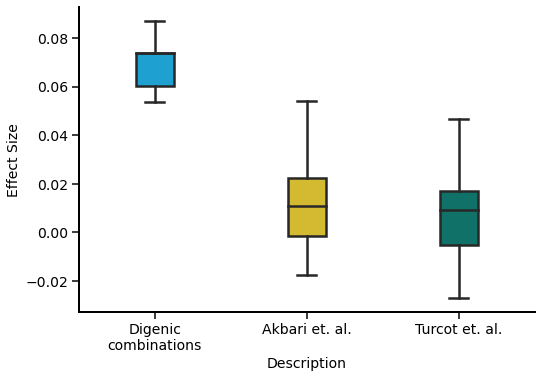

In [5]:
boxdf = efs_df

# # Define Canvas
# fig,ax = plt.subplots(1, 1, figsize=(8, 8))

# Box Plot
sns_ax = sns.catplot(
    data=boxdf,
    palette=["#00ADEE", "#eecc16", "#008176"],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#c1272d", 
    kind="box",
    x="Description",
    y="Effect Size",
    orient="v",
    aspect=1.5,
    width=0.25,
    linewidth=2.5,
    fliersize=3.5
    )


# Adjust Axis
# sns_ax.ax.set_yticks([-0.02, 0, 0.02, 0.04])
# sns_ax.ax.set_ylim((-0.025, 0.05))
# ax.set_ylabel('Percentage')
sns_ax.ax.set_xticklabels(["Digenic\ncombinations",  "Akbari et. al.", "Turcot et. al."], # "Trigenic\ncombinations",
    rotation=0)
# ax.set_ticklabels(
#     [],
#     rotation=90)

# # Remove Spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

In [6]:
digenic_effect_sizes = boxdf.loc[boxdf["Description"]=="Digenic combinations", "Effect Size"]
# trigenic_effect_sizes = boxdf.loc[boxdf["Description"]=="Trigenic combinations", "Effect Size"]
akbari_effect_sizes = boxdf.loc[boxdf["Description"]=="Akbari et. al.", "Effect Size"]
turcot_effect_sizes = boxdf.loc[boxdf["Description"]=="Turcot et. al.", "Effect Size"]

In [7]:
ttest_ind(digenic_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(digenic_effect_sizes, akbari_effect_sizes)

(Ttest_indResult(statistic=4.831426941774003, pvalue=0.0001639293350414031),
 KstestResult(statistic=0.9, pvalue=0.003996003996004083))

In [8]:
ttest_ind(digenic_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(digenic_effect_sizes, turcot_effect_sizes)

(Ttest_indResult(statistic=5.242420302523502, pvalue=0.0001887406571256329),
 KstestResult(statistic=1.0, pvalue=0.002525252525252486))

In [9]:
# ttest_ind(trigenic_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(trigenic_effect_sizes, akbari_effect_sizes)

In [10]:
# ttest_ind(trigenic_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(trigenic_effect_sizes, turcot_effect_sizes)

In [11]:
all_combo_effect_sizes = pd.concat((digenic_effect_sizes, )) # trigenic_effect_sizes
published_studies_effect_sizes = pd.concat((akbari_effect_sizes, turcot_effect_sizes))

In [12]:
ttest_ind(all_combo_effect_sizes, published_studies_effect_sizes, alternative="greater"), kstest(all_combo_effect_sizes, published_studies_effect_sizes)

(Ttest_indResult(statistic=5.298561239379713, pvalue=1.7367790531896127e-05),
 KstestResult(statistic=0.9411764705882353, pvalue=0.00045568466621115356))